<a href="https://colab.research.google.com/github/Pranjal-24885/AI-projects/blob/main/Facebook_Prophet_Model_for_TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define a function to generate seasonal data
def generate_seasonal_data(start_date, period, seasonality_factor):
    data = pd.DataFrame({
        "ds": pd.date_range(start_date, periods=period, freq="D")
    })
    data["y"] = np.sin(2 * np.pi * data["ds"].dt.dayofyear / 365) * seasonality_factor # This creates a smooth sine wave across the year → mimicking yearly seasonality.
    return data

In [ ]:
# Generate data with a yearly seasonality pattern
data = generate_seasonal_data("2020-01-01", 365, 10)  # 1 year of data with seasonality factor of 10


In [ ]:
data

,ds,y
0,2020-01-01,1.721336e-01
1,2020-01-02,3.442161e-01
2,2020-01-03,5.161967e-01
3,2020-01-04,6.880243e-01
4,2020-01-05,8.596480e-01
...,...,...
360,2020-12-26,-6.880243e-01
361,2020-12-27,-5.161967e-01
362,2020-12-28,-3.442161e-01
363,2020-12-29,-1.721336e-01


In [ ]:
# Forecast for the next 2 years (730 days)
future = data.copy()
future["ds"] = future["ds"] + pd.DateOffset(days=730)  # Extend data for forecasting


In [ ]:
future

,ds,y
0,2021-12-31,1.721336e-01
1,2022-01-01,3.442161e-01
2,2022-01-02,5.161967e-01
3,2022-01-03,6.880243e-01
4,2022-01-04,8.596480e-01
...,...,...
360,2022-12-26,-6.880243e-01
361,2022-12-27,-5.161967e-01
362,2022-12-28,-3.442161e-01
363,2022-12-29,-1.721336e-01


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd18ucjx/yuag3i89.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwd18ucjx/hrb3rwdw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86010', 'data', 'file=/tmp/tmpwd18ucjx/yuag3i89.json', 'init=/tmp/tmpwd18ucjx/hrb3rwdw.json', 'output', 'file=/tmp/tmpwd18ucjx/prophet_modelu84vt888/prophet_model-20250909050633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:06:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:06:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


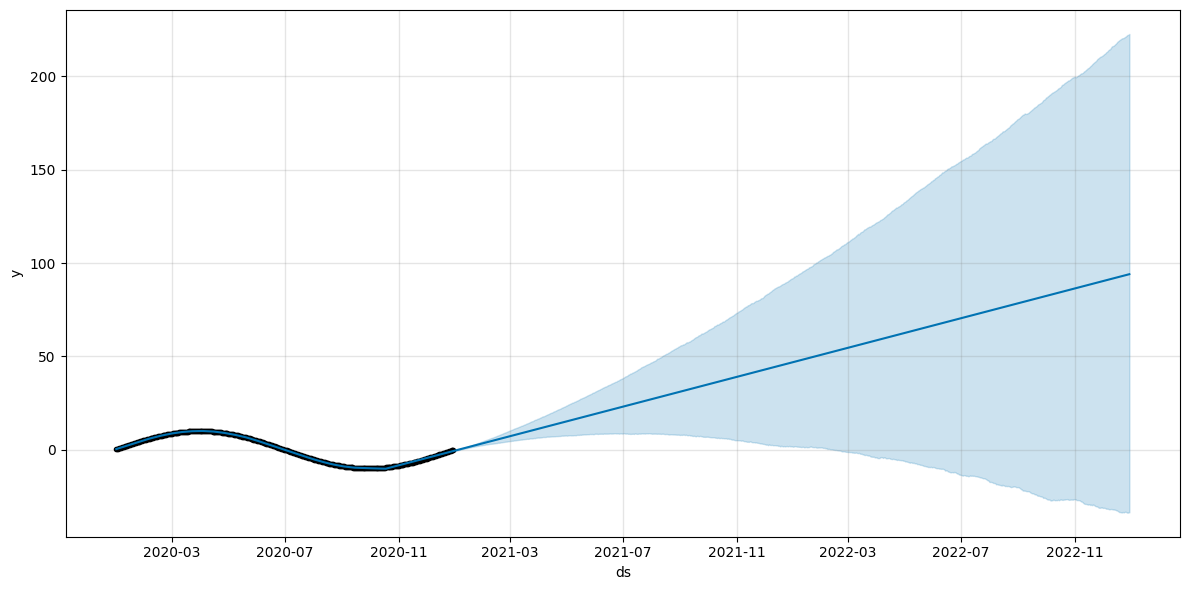

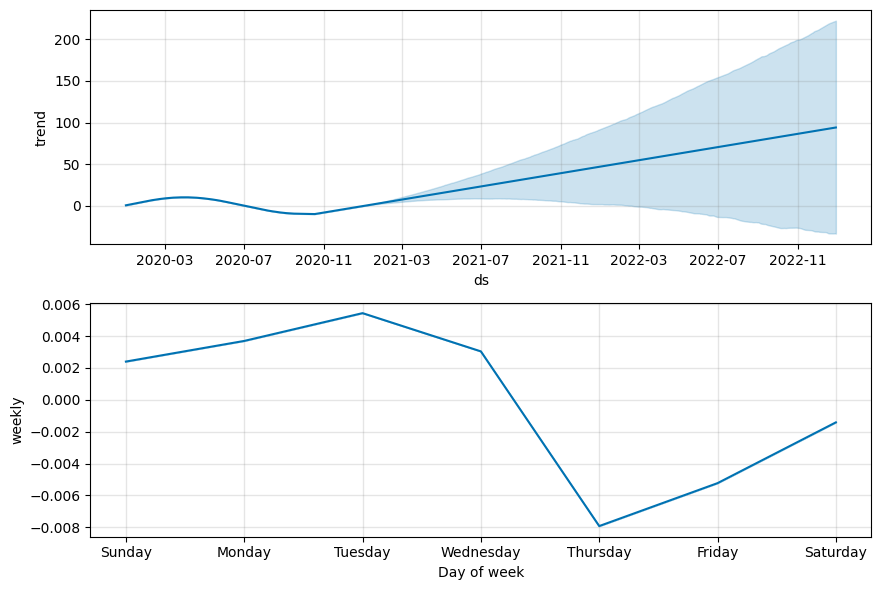

In [ ]:
# Create and fit the Prophet model
model = Prophet()
model.fit(data)

# Make the forecast
forecast = model.make_future_dataframe(periods=730)  # Forecast for 2 years
forecast = model.predict(forecast)

# Plot the actual data and forecast
model.plot(forecast, figsize=(12, 6))
model.plot_components(forecast)  # View separate components of the forecast

# Show the plot
plt.show()

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,0.352648,0.121913,0.589814,0.352648,0.352648,0.003040,0.003040,0.003040,0.003040,0.003040,0.003040,0.0,0.0,0.0,0.355688
1,2020-01-02,0.508745,0.243672,0.724184,0.508745,0.508745,-0.007929,-0.007929,-0.007929,-0.007929,-0.007929,-0.007929,0.0,0.0,0.0,0.500816
2,2020-01-03,0.664842,0.440323,0.892295,0.664842,0.664842,-0.005233,-0.005233,-0.005233,-0.005233,-0.005233,-0.005233,0.0,0.0,0.0,0.659608
3,2020-01-04,0.820938,0.583975,1.055456,0.820938,0.820938,-0.001416,-0.001416,-0.001416,-0.001416,-0.001416,-0.001416,0.0,0.0,0.0,0.819522
4,2020-01-05,0.977035,0.743338,1.213801,0.977035,0.977035,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.0,0.0,0.0,0.979436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2022-12-26,93.492907,-33.285891,221.235734,-33.552219,221.401957,0.003697,0.003697,0.003697,0.003697,0.003697,0.003697,0.0,0.0,0.0,93.496604
1091,2022-12-27,93.622666,-33.500167,221.721382,-33.509248,221.707034,0.005442,0.005442,0.005442,0.005442,0.005442,0.005442,0.0,0.0,0.0,93.628108
1092,2022-12-28,93.752425,-33.793723,222.158289,-33.414036,222.012110,0.003040,0.003040,0.003040,0.003040,0.003040,0.003040,0.0,0.0,0.0,93.755465
1093,2022-12-29,93.882184,-33.580523,222.233792,-33.531350,222.317187,-0.007929,-0.007929,-0.007929,-0.007929,-0.007929,-0.007929,0.0,0.0,0.0,93.874255
